In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [249]:
data = pd.read_csv('kc_house_data.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [250]:
data = data.assign(v_1 = 1)

In [251]:
data['sqft_living2'] = data['sqft_living'] ** 2
data['sqft_living3'] = data['sqft_living'] ** 3
data['sqft_living4'] = data['sqft_living'] ** 4

In [252]:
y = data[['price']].to_numpy()
X = data[['v_1','sqft_living','sqft_living2','sqft_living3','sqft_living4']].to_numpy()
print(y.shape)
print(X.shape)

(21613, 1)
(21613, 5)


In [253]:
21613*0.6
12967+(21613*0.2)

17289.6

In [254]:
np.random.shuffle(X)
np.random.shuffle(y)
X_train = X[:12967]
y_train = y[:12967]
X_cv = X[12967:17289]
y_cv = y[12967:17289]
X_test = X[17290:21613]
X_test = y[17290:21613]

In [255]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [256]:
m, n = X_train.shape

In [257]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(5, 1)


In [258]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0000000000000000000000000000001, threshold = 0.0001, max_iter=10000):
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [259]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

In [260]:
thetas

array([[ 3.22717830e-01],
       [ 3.37236395e-01],
       [ 2.52949438e-01],
       [ 4.46471934e-01],
       [-4.44344401e-05]])

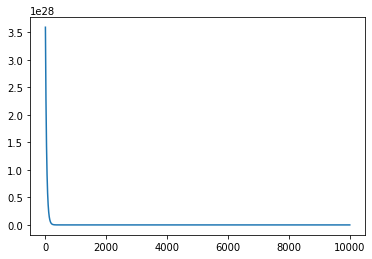

In [261]:
plt.plot(costs)

In [262]:
min(costs)

3.1019186782453567e+19

In [263]:
y = data[['price']].to_numpy()
X = data[['v_1','sqft_living','sqft_living2','sqft_living3']].to_numpy()
print(y.shape)
print(X.shape)

(21613, 1)
(21613, 4)


In [264]:
21613*0.6
12967+(21613*0.2)

17289.6

In [265]:
np.random.shuffle(X)
np.random.shuffle(y)
X_train = X[:12967]
y_train = y[:12967]
X_cv = X[12967:17289]
y_cv = y[12967:17289]
X_test = X[17290:21613]
X_test = y[17290:21613]

In [266]:
X_train[[8]]

array([[         1,       2020,    4080400, 8242408000]], dtype=int64)

In [267]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [268]:
m, n = X_train.shape

In [269]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(4, 1)


In [270]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.000000000000000000001, threshold = 0.0001, max_iter=10000):

    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [271]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

In [272]:
thetas

array([[ 9.85534307e-01],
       [ 4.23022564e-01],
       [ 6.91451996e-01],
       [-1.31128103e-04]])

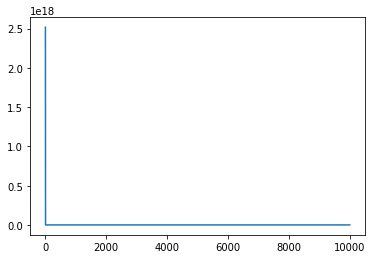

In [273]:
plt.plot(costs)

In [274]:
min(costs)

1431169996768.9094

In [275]:
y = data[['price']].to_numpy()
X = data[['v_1','sqft_living','sqft_living2']].to_numpy()
print(y.shape)
print(X.shape)

(21613, 1)
(21613, 3)


In [276]:
21613*0.6
12967+(21613*0.2)

17289.6

In [277]:
np.random.shuffle(X)
np.random.shuffle(y)
X_train = X[:12967]
y_train = y[:12967]
X_cv = X[12967:17289]
y_cv = y[12967:17289]
X_test = X[17290:21613]
X_test = y[17290:21613]

In [278]:
X_train[[8]]

array([[      1,    1780, 3168400]], dtype=int64)

In [279]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [280]:
m, n = X_train.shape

In [281]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(3, 1)


In [282]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.00000000000001, threshold = 0.0001, max_iter=10000):

    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [283]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

In [284]:
thetas

array([[0.27564888],
       [0.8854973 ],
       [0.05090749]])

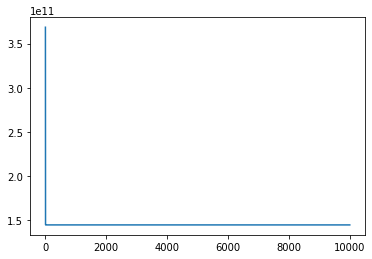

In [285]:
plt.plot(costs)

In [286]:
min(costs)

144949757159.81592

In [287]:
y = data[['price']].to_numpy()
X = data[['v_1','sqft_living']].to_numpy()
print(y.shape)
print(X.shape)

(21613, 1)
(21613, 2)


In [288]:
21613*0.6
12967+(21613*0.2)

17289.6

In [289]:
np.random.shuffle(X)
np.random.shuffle(y)
X_train = X[:12967]
y_train = y[:12967]
X_cv = X[12967:17289]
y_cv = y[12967:17289]
X_test = X[17290:21613]
X_test = y[17290:21613]

In [290]:
X_train[[8]]

array([[   1, 2210]], dtype=int64)

In [291]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [292]:
m, n = X_train.shape

In [293]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(2, 1)


In [294]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.00000000001, threshold = 0.0001, max_iter=10000):

    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [295]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

In [296]:
thetas

array([[ 0.11173144],
       [87.40512727]])

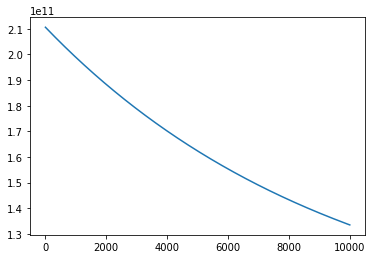

In [297]:
plt.plot(costs)

In [298]:
min(costs)

133523434950.11452

# Conclusion

### Se recomienda utilizar un polinomio grado 4 para esta regrersión, debdio a que su error alcanzado es muchisimo menor que en el resto de modelos